In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [9]:
d = 2
beta = np.array([0.75, -2.95])

In [10]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [11]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [12]:
num_sim = 1000

## load simulation

In [13]:
data = pd.read_feather('data/simulation_randinf_3.feather')

In [14]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,4.414662,441.463115,480.0,0.956069,1,0
1,0,1,4.414662,472.207524,475.0,0.962545,0,0
2,0,2,4.414662,583.517000,588.0,0.968338,1,0
3,0,3,4.414662,762.157505,670.0,0.974015,1,0
4,0,4,4.414662,997.240682,955.0,0.981203,0,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,686.970707,727.0,28.330299,27,1
59996,999,56,0.648378,653.139142,671.0,26.949973,22,1
59997,999,57,0.648378,620.762316,653.0,25.620683,22,1
59998,999,58,0.648378,589.514828,716.0,24.328280,22,1


# 3. Fit

In [15]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, "nbinom")

In [16]:
nsim = np.zeros(num_sim)
msim = np.zeros(num_sim)
bsim = np.zeros((num_sim,d))

In [17]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=500, step_size=1,
              history=False, verbose=False)
    
    nsim[iter_sim] = nmle
    msim[iter_sim] = mmle
    bsim[iter_sim,:] = bmle
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:140: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-th simulation finished, 3.670403 sec.
2-th simulation finished, 3.626230 sec.
3-th simulation finished, 3.373973 sec.
4-th simulation finished, 3.498934 sec.
5-th simulation finished, 3.459901 sec.
6-th simulation finished, 3.505938 sec.
7-th simulation finished, 3.787037 sec.
8-th simulation finished, 3.604221 sec.
9-th simulation finished, 3.512252 sec.
10-th simulation finished, 3.501702 sec.
11-th simulation finished, 3.491172 sec.
12-th simulation finished, 3.268810 sec.
13-th simulation finished, 3.382079 sec.
14-th simulation finished, 3.990385 sec.
15-th simulation finished, 4.324591 sec.
16-th simulation finished, 3.479277 sec.
17-th simulation finished, 3.569700 sec.
18-th simulation finished, 3.592837 sec.
19-th simulation finished, 3.683398 sec.
20-th simulation finished, 3.182866 sec.
21-th simulation finished, 3.459124 sec.
22-th simulation finished, 3.399015 sec.
23-th simulation finished, 3.597824 sec.
24-th simulation finished, 3.711947 sec.
25-th simulation finished

199-th simulation finished, 3.553466 sec.
200-th simulation finished, 3.534285 sec.
201-th simulation finished, 3.493871 sec.
202-th simulation finished, 3.509472 sec.
203-th simulation finished, 3.477075 sec.
204-th simulation finished, 3.397436 sec.
205-th simulation finished, 3.667896 sec.
206-th simulation finished, 3.332660 sec.
207-th simulation finished, 3.437609 sec.
208-th simulation finished, 3.130658 sec.
209-th simulation finished, 3.957481 sec.
210-th simulation finished, 3.382828 sec.
211-th simulation finished, 3.698038 sec.
212-th simulation finished, 3.222483 sec.
213-th simulation finished, 3.442986 sec.
214-th simulation finished, 3.184535 sec.
215-th simulation finished, 3.437384 sec.
216-th simulation finished, 3.337457 sec.
217-th simulation finished, 3.127741 sec.
218-th simulation finished, 3.254651 sec.
219-th simulation finished, 3.454319 sec.
220-th simulation finished, 3.832863 sec.
221-th simulation finished, 3.410488 sec.
222-th simulation finished, 3.7399

395-th simulation finished, 3.226229 sec.
396-th simulation finished, 3.407548 sec.
397-th simulation finished, 3.305044 sec.
398-th simulation finished, 3.380936 sec.
399-th simulation finished, 3.246534 sec.
400-th simulation finished, 3.471140 sec.
401-th simulation finished, 3.561502 sec.
402-th simulation finished, 3.252157 sec.
403-th simulation finished, 3.703674 sec.
404-th simulation finished, 3.327440 sec.
405-th simulation finished, 3.469507 sec.
406-th simulation finished, 3.509283 sec.
407-th simulation finished, 3.340868 sec.
408-th simulation finished, 3.230602 sec.
409-th simulation finished, 3.345206 sec.
410-th simulation finished, 3.378175 sec.
411-th simulation finished, 3.524541 sec.
412-th simulation finished, 3.653397 sec.
413-th simulation finished, 3.300928 sec.
414-th simulation finished, 3.427385 sec.
415-th simulation finished, 3.694513 sec.
416-th simulation finished, 3.379089 sec.
417-th simulation finished, 3.458874 sec.
418-th simulation finished, 3.6706

591-th simulation finished, 3.715986 sec.
592-th simulation finished, 3.587841 sec.
593-th simulation finished, 3.992890 sec.
594-th simulation finished, 3.116856 sec.
595-th simulation finished, 3.630224 sec.
596-th simulation finished, 3.187302 sec.
597-th simulation finished, 3.865790 sec.
598-th simulation finished, 3.608424 sec.
599-th simulation finished, 3.539221 sec.
600-th simulation finished, 3.793861 sec.
601-th simulation finished, 3.461930 sec.
602-th simulation finished, 3.094389 sec.
603-th simulation finished, 3.463442 sec.
604-th simulation finished, 3.222306 sec.
605-th simulation finished, 3.200376 sec.
606-th simulation finished, 3.533709 sec.
607-th simulation finished, 3.273310 sec.
608-th simulation finished, 3.007637 sec.
609-th simulation finished, 3.315797 sec.
610-th simulation finished, 3.357501 sec.
611-th simulation finished, 3.391882 sec.
612-th simulation finished, 3.338250 sec.
613-th simulation finished, 3.348798 sec.
614-th simulation finished, 3.1676

787-th simulation finished, 4.713706 sec.
788-th simulation finished, 4.503377 sec.
789-th simulation finished, 4.619119 sec.
790-th simulation finished, 4.375590 sec.
791-th simulation finished, 4.378013 sec.
792-th simulation finished, 4.711555 sec.
793-th simulation finished, 4.490011 sec.
794-th simulation finished, 4.959369 sec.
795-th simulation finished, 4.972185 sec.
796-th simulation finished, 5.440397 sec.
797-th simulation finished, 4.835677 sec.
798-th simulation finished, 4.265407 sec.
799-th simulation finished, 4.340591 sec.
800-th simulation finished, 5.051067 sec.
801-th simulation finished, 4.860147 sec.
802-th simulation finished, 4.222221 sec.
803-th simulation finished, 4.078972 sec.
804-th simulation finished, 4.452008 sec.
805-th simulation finished, 3.962231 sec.
806-th simulation finished, 4.539188 sec.
807-th simulation finished, 4.130806 sec.
808-th simulation finished, 4.347696 sec.
809-th simulation finished, 4.376611 sec.
810-th simulation finished, 4.0610

983-th simulation finished, 4.489445 sec.
984-th simulation finished, 4.561003 sec.
985-th simulation finished, 4.737207 sec.
986-th simulation finished, 4.352810 sec.
987-th simulation finished, 4.241082 sec.
988-th simulation finished, 5.392061 sec.
989-th simulation finished, 4.844522 sec.
990-th simulation finished, 4.619131 sec.
991-th simulation finished, 4.340704 sec.
992-th simulation finished, 4.406046 sec.
993-th simulation finished, 4.134834 sec.
994-th simulation finished, 4.449857 sec.
995-th simulation finished, 5.317865 sec.
996-th simulation finished, 4.548133 sec.
997-th simulation finished, 4.698073 sec.
998-th simulation finished, 4.510146 sec.
999-th simulation finished, 4.167244 sec.
1000-th simulation finished, 4.509541 sec.


In [18]:
np.savez('coverage_freqepid_nbinom_randinf_3.npz',
         nsim = nsim, msim = msim, bsim = bsim)

# 4. Wald's Confidence Region Coverage Test

In [20]:
# locals.update(np.load('coverage_freqepid_nbinom_randinf_3.npz'))

In [19]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [20]:
Ihs_hac = np.zeros([num_sim, 2+d, 2+d])
Ts_hac = np.zeros(num_sim)
ps_hac = np.zeros(num_sim)

In [21]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [22]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    nmle = nsim[iter_sim]
    mmle = msim[iter_sim]
    bmle = bsim[iter_sim,:]
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    # Fisher information matrix
    Ihs_dth[iter_sim] = Ihat_dth
    Ts_dth[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    # HAC estimator
    Ihs_hac[iter_sim] = Ihat_hac
    Ts_hac[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_hac[iter_sim])[-1,-1])
    ps_hac[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_hac[iter_sim])))
    
    # Sandwich estimator
    Ihs_sdw[iter_sim] = Ihat_sdw
    Ts_sdw[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.006850 sec.
2-th simulation finished, 0.010318 sec.
3-th simulation finished, 0.001968 sec.
4-th simulation finished, 0.003217 sec.
5-th simulation finished, 0.001921 sec.
6-th simulation finished, 0.001722 sec.
7-th simulation finished, 0.001841 sec.
8-th simulation finished, 0.001959 sec.
9-th simulation finished, 0.001708 sec.
10-th simulation finished, 0.005919 sec.
11-th simulation finished, 0.001742 sec.
12-th simulation finished, 0.001698 sec.
13-th simulation finished, 0.001586 sec.
14-th simulation finished, 0.001547 sec.
15-th simulation finished, 0.001552 sec.
16-th simulation finished, 0.001519 sec.
17-th simulation finished, 0.001552 sec.
18-th simulation finished, 0.001522 sec.
19-th simulation finished, 0.004498 sec.
20-th simulation finished, 0.003227 sec.
21-th simulation finished, 0.003031 sec.
22-th simulation finished, 0.002794 sec.
23-th simulation finished, 0.001781 sec.
24-th simulation finished, 0.001757 sec.
25-th simulation finished

232-th simulation finished, 0.010605 sec.
233-th simulation finished, 0.011854 sec.
234-th simulation finished, 0.010532 sec.
235-th simulation finished, 0.012037 sec.
236-th simulation finished, 0.003114 sec.
237-th simulation finished, 0.002962 sec.
238-th simulation finished, 0.002835 sec.
239-th simulation finished, 0.001663 sec.
240-th simulation finished, 0.002034 sec.
241-th simulation finished, 0.003483 sec.
242-th simulation finished, 0.002884 sec.
243-th simulation finished, 0.001927 sec.
244-th simulation finished, 0.001835 sec.
245-th simulation finished, 0.003269 sec.
246-th simulation finished, 0.001891 sec.
247-th simulation finished, 0.003010 sec.
248-th simulation finished, 0.002084 sec.
249-th simulation finished, 0.001756 sec.
250-th simulation finished, 0.001837 sec.
251-th simulation finished, 0.001707 sec.
252-th simulation finished, 0.012743 sec.
253-th simulation finished, 0.003203 sec.
254-th simulation finished, 0.002941 sec.
255-th simulation finished, 0.0028

428-th simulation finished, 0.010693 sec.
429-th simulation finished, 0.002048 sec.
430-th simulation finished, 0.001666 sec.
431-th simulation finished, 0.001685 sec.
432-th simulation finished, 0.001627 sec.
433-th simulation finished, 0.001654 sec.
434-th simulation finished, 0.001634 sec.
435-th simulation finished, 0.001651 sec.
436-th simulation finished, 0.001670 sec.
437-th simulation finished, 0.001649 sec.
438-th simulation finished, 0.001612 sec.
439-th simulation finished, 0.001642 sec.
440-th simulation finished, 0.001611 sec.
441-th simulation finished, 0.001640 sec.
442-th simulation finished, 0.002101 sec.
443-th simulation finished, 0.001789 sec.
444-th simulation finished, 0.001727 sec.
445-th simulation finished, 0.001655 sec.
446-th simulation finished, 0.001666 sec.
447-th simulation finished, 0.004521 sec.
448-th simulation finished, 0.001737 sec.
449-th simulation finished, 0.001629 sec.
450-th simulation finished, 0.001656 sec.
451-th simulation finished, 0.0016

630-th simulation finished, 0.004687 sec.
631-th simulation finished, 0.001995 sec.
632-th simulation finished, 0.003102 sec.
633-th simulation finished, 0.002852 sec.
634-th simulation finished, 0.002944 sec.
635-th simulation finished, 0.001721 sec.
636-th simulation finished, 0.001720 sec.
637-th simulation finished, 0.001674 sec.
638-th simulation finished, 0.002495 sec.
639-th simulation finished, 0.003147 sec.
640-th simulation finished, 0.002849 sec.
641-th simulation finished, 0.001698 sec.
642-th simulation finished, 0.001590 sec.
643-th simulation finished, 0.001504 sec.
644-th simulation finished, 0.001569 sec.
645-th simulation finished, 0.001618 sec.
646-th simulation finished, 0.001646 sec.
647-th simulation finished, 0.003565 sec.
648-th simulation finished, 0.001703 sec.
649-th simulation finished, 0.001669 sec.
650-th simulation finished, 0.001631 sec.
651-th simulation finished, 0.001647 sec.
652-th simulation finished, 0.001632 sec.
653-th simulation finished, 0.0016

873-th simulation finished, 0.002920 sec.
874-th simulation finished, 0.002969 sec.
875-th simulation finished, 0.002796 sec.
876-th simulation finished, 0.003715 sec.
877-th simulation finished, 0.001791 sec.
878-th simulation finished, 0.001771 sec.
879-th simulation finished, 0.001647 sec.
880-th simulation finished, 0.001666 sec.
881-th simulation finished, 0.001626 sec.
882-th simulation finished, 0.001653 sec.
883-th simulation finished, 0.001624 sec.
884-th simulation finished, 0.012197 sec.
885-th simulation finished, 0.001860 sec.
886-th simulation finished, 0.001735 sec.
887-th simulation finished, 0.010557 sec.
888-th simulation finished, 0.009979 sec.
889-th simulation finished, 0.002990 sec.
890-th simulation finished, 0.002991 sec.
891-th simulation finished, 0.001769 sec.
892-th simulation finished, 0.001646 sec.
893-th simulation finished, 0.003899 sec.
894-th simulation finished, 0.003110 sec.
895-th simulation finished, 0.002768 sec.
896-th simulation finished, 0.0036

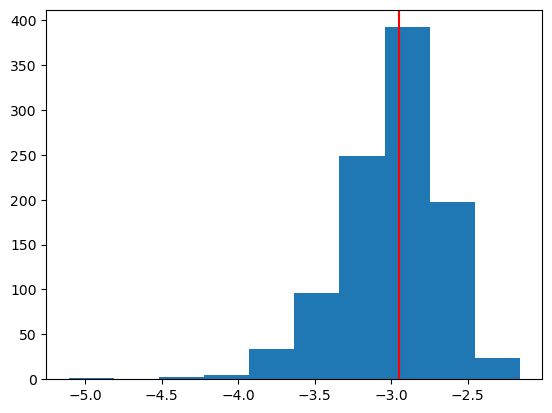

In [23]:
plt.hist(bsim[:,1])
plt.axvline(beta[1], color='red')

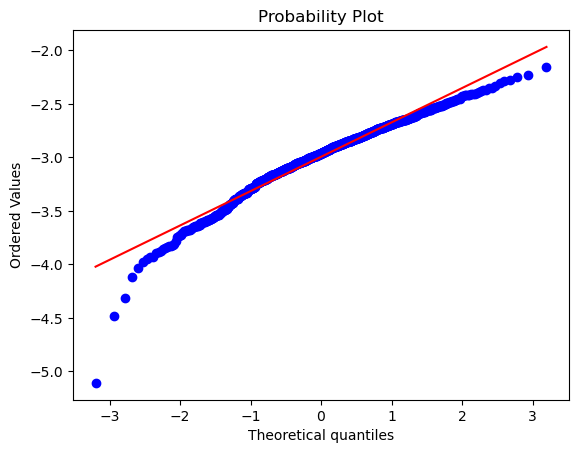

In [24]:
stats.probplot(bsim[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

(array([ 75., 151., 249., 233., 156.,  86.,  34.,  12.,   3.,   1.]),
 array([-1.9627979 , -1.3432855 , -0.72377309, -0.10426068,  0.51525173,
         1.13476414,  1.75427654,  2.37378895,  2.99330136,  3.61281377,
         4.23232618]),
 <BarContainer object of 10 artists>)

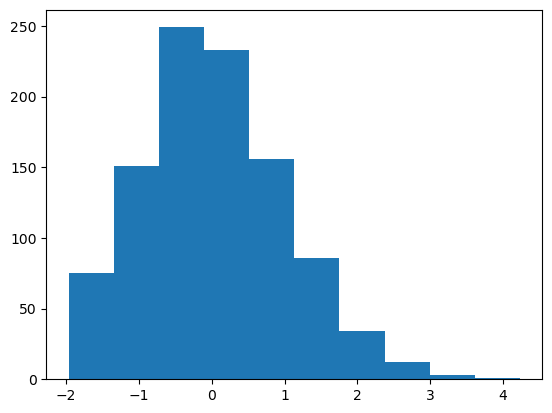

In [25]:
plt.hist(Ts_dth)

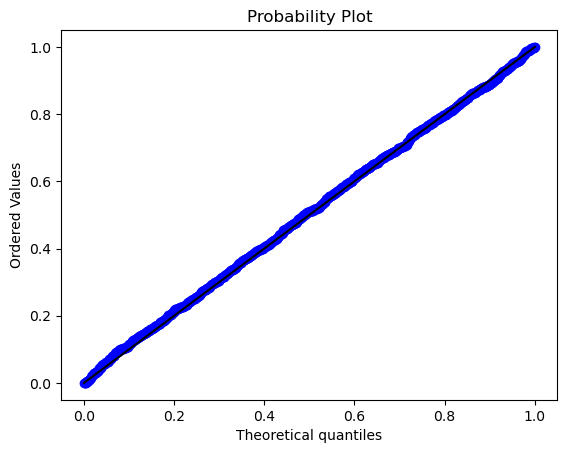

In [26]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [27]:
np.mean(np.abs(ps_dth) > 0.05)

0.961

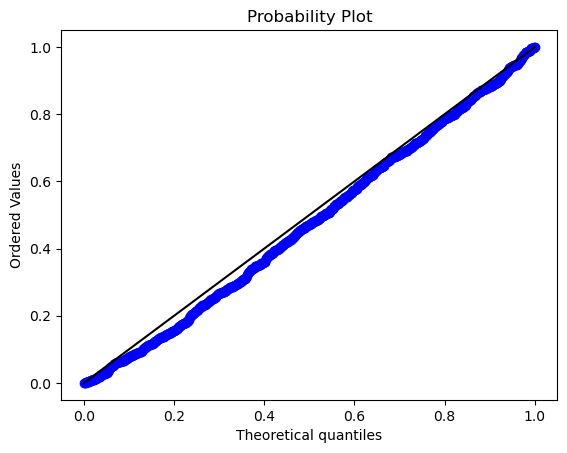

In [30]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [29]:
np.mean(np.abs(ps_sdw) > 0.05)

0.938